In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


2025-02-21 00:45:35.379531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
stock="nic_recent.csv"

In [30]:
data=pd.read_csv(stock)

In [32]:
data

,BUSINESS DATE,CLOSE PRICE,HIGH PRICE,LOW PRICE,TOTAL TRADED QUANTITY,TOTAL TRADED VALUE,TOTAL TRADES
0,2025-02-20,374.5,384.5,373.6,42089,15847811.6,319
1,2025-02-18,377.0,389.6,375.0,74518,28374584.9,542
2,2025-02-17,382.0,386.9,370.7,108899,41212054.5,638
3,2025-02-16,370.7,370.9,365.0,70533,26014490.4,422
4,2025-02-13,363.0,366.0,360.0,47627,17318839.0,307
...,...,...,...,...,...,...,...
224,2024-02-28,415.0,418.0,413.0,36695,15235126.3,377
225,2024-02-27,418.5,426.0,412.3,70324,29412585.3,552
226,2024-02-26,418.0,419.9,405.1,98421,40737576.9,629
227,2024-02-25,410.9,430.0,410.0,176046,73159346.7,1291


In [35]:
data_test=data["CLOSE PRICE"]

In [36]:
# Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
# data_train_scaled = scaler.fit_transform(np.array(data_train).reshape(-1,1))
data_test_scaled = scaler.fit_transform(np.array(data_test).reshape(-1,1))

In [37]:
x_test, y_test = [], []
for i in range(100, len(data_test_scaled)):
    x_test.append(data_test_scaled[i-100:i])
    y_test.append(data_test_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [38]:
print(f"Shape of train={x_test.shape}\nShape of data_test={y_test.shape}")

Shape of train=(129, 100, 1)
Shape of data_test=(129,)


In [39]:
from tensorflow.keras.models import load_model

# Load the saved Keras model
model = load_model('stock_model.keras')

# Now you can use the model to make predictions, evaluate, etc.


In [40]:
# Make Predictions
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

5/5 [==============================] - 1s 59ms/step


In [41]:
# Performance Metrics
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R² Score:", r2_score(y_test_actual, y_pred))

MAE: 15.34605168778767
R² Score: 0.8510303841834328


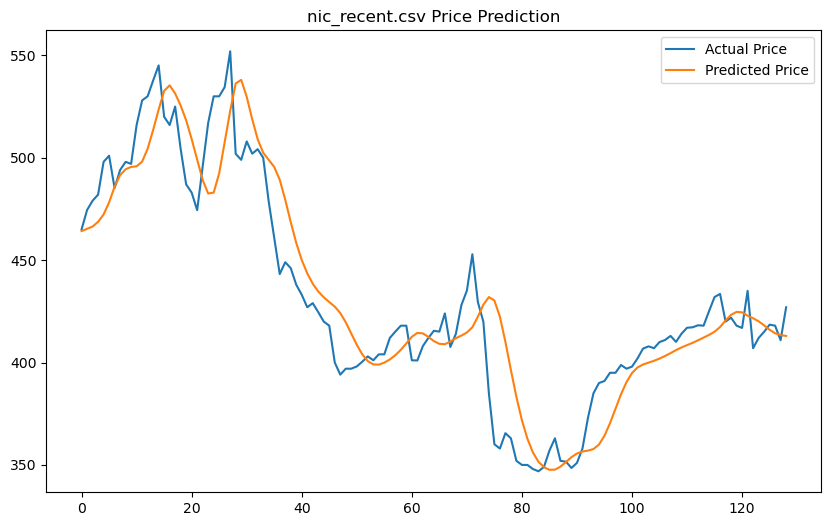

In [42]:

# Visualization
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title(f'{stock} Price Prediction')
plt.savefig(f"{stock}.png")
plt.show()
